# Import the necessary packages.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

Importing the data

In [3]:
df = pd.read_csv('indian_liver_patients.csv')

# 1. Analyze the data

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [5]:
df.shape

(583, 11)

In [6]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object

As we can see except of one column all other columns are either int or float.

In [7]:
df.corr()

C:\Users\vidit\AppData\Local\Temp\ipykernel_5748\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Label,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


No corelation is more than 0.6

# 2. Visualizing the numeric attributes

1. Density plot of Age attribute.

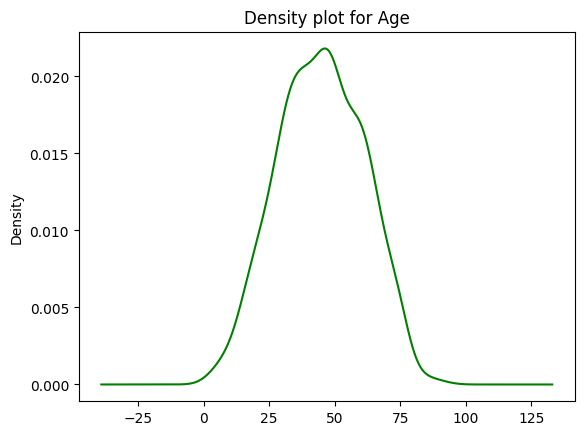

In [8]:
df.Age.plot.density(color='green')
plt.title('Density plot for Age')
plt.show()

From the graph we can conclude that the attribute is similar to gaussian distribution, and most of the data is of people around the age of 25-75.

2. Density plot of Total_Bilirubin

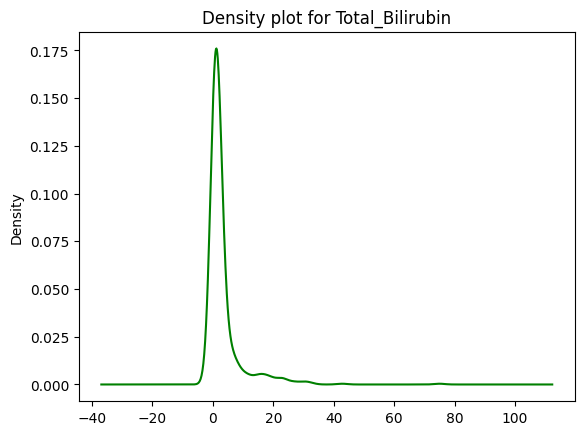

In [9]:
df.Total_Bilirubin.plot.density(color='green')
plt.title('Density plot for Total_Bilirubin')
plt.show()

Most of the values are between 0 and 10

3. Density plot of Direct_Bilirubin

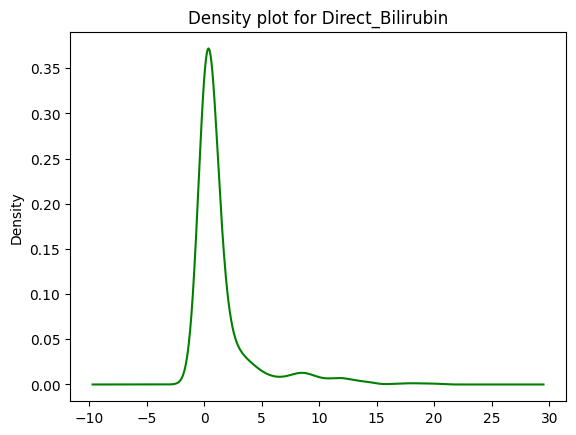

In [10]:
df.Direct_Bilirubin.plot.density(color='green')
plt.title('Density plot for Direct_Bilirubin')
plt.show()

The majority of the values are between 0 and 4. But the data is also quite spread.

4. Density plot of Alkaline_Phosphotase

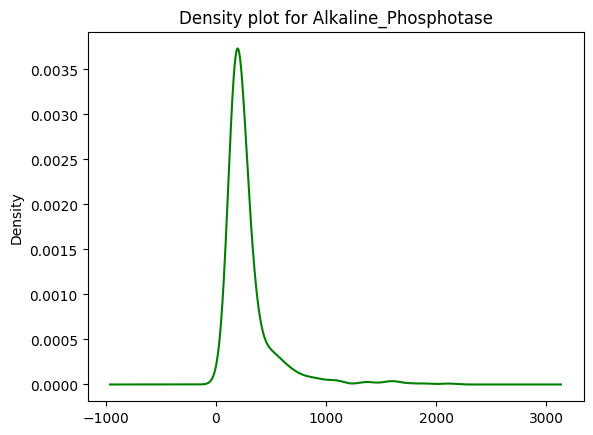

In [11]:
df.Alkaline_Phosphotase.plot.density(color='green')
plt.title('Density plot for Alkaline_Phosphotase')
plt.show()

The values are mostly between 0 and 300. The values are very spreaded after 600.

5. Density Graph of Alamine_Aminotransferase

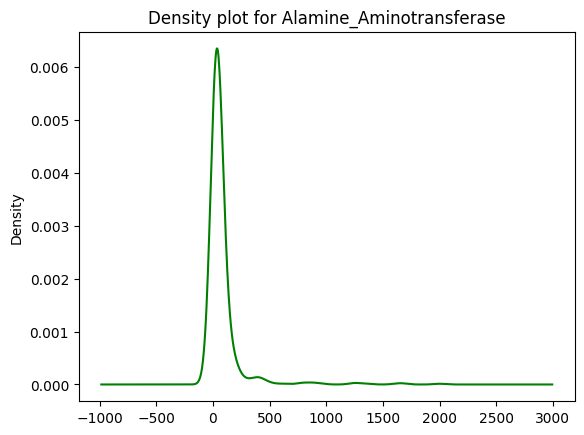

In [12]:
df.Alamine_Aminotransferase.plot.density(color='green')
plt.title('Density plot for Alamine_Aminotransferase')
plt.show()

6. Density graph of Aspartate_Aminotransferase

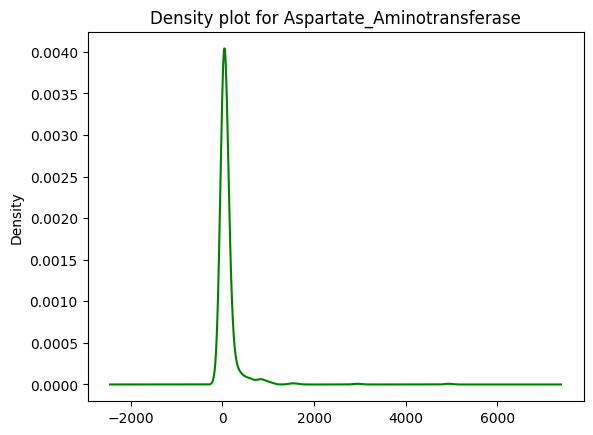

In [13]:
df.Aspartate_Aminotransferase.plot.density(color='green')
plt.title('Density plot for Aspartate_Aminotransferase')
plt.show()

7. Density graph of Total_Protiens

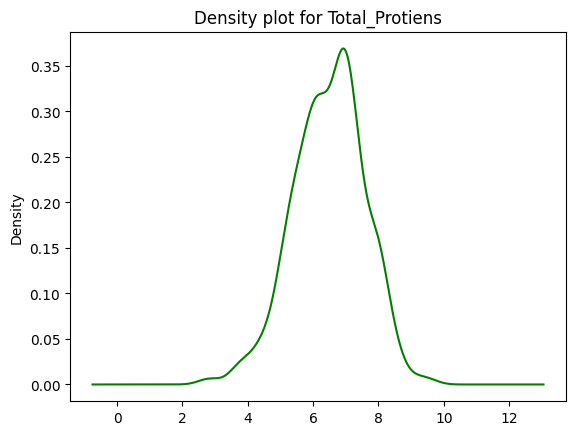

In [14]:
df.Total_Protiens.plot.density(color='green')
plt.title('Density plot for Total_Protiens')
plt.show()

8. Density graph of Albumin

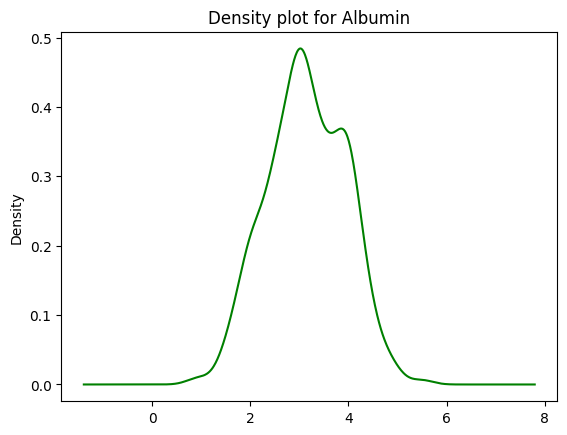

In [15]:
df.Albumin.plot.density(color='green')
plt.title('Density plot for Albumin')
plt.show()

9. Density graph of Albumin_and_Globulin_Ratio

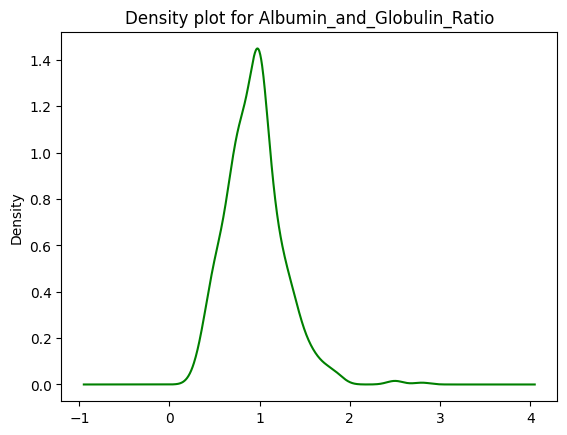

In [16]:
df.Albumin_and_Globulin_Ratio.plot.density(color='green')
plt.title('Density plot for Albumin_and_Globulin_Ratio')
plt.show()

10. Visualizing density graph of Label(Target Class)

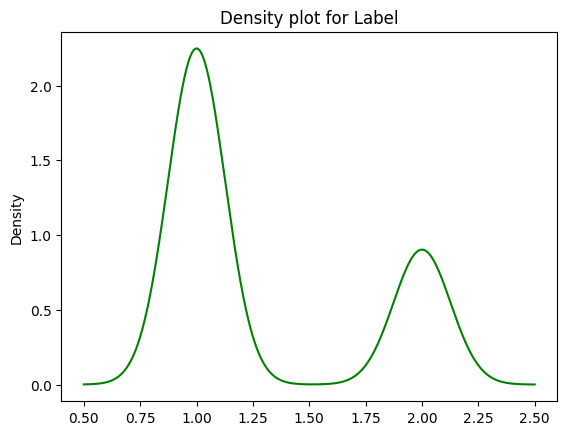

In [17]:
df.Label.plot.density(color='green')
plt.title('Density plot for Label')
plt.show()

# 3. Curating the data.

Finding the missing values.

In [18]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

One column has 4 null vales. And there are total of 583 rows. So instead of filling the rows with the missing values we can just drop 4 rows.

In [19]:
df.dropna(how='any', inplace=True)

In [20]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Label                         0
dtype: int64

In [21]:
df.shape

(579, 11)

Now as we can see 4 rows are removed from the dataframe.

# 4. Preprocessing Data

1. Encoding : There is a string column('Gender') that we need to change to numeric.
    Using label encoder

In [22]:
le = LabelEncoder()

In [23]:
df['Gender'] = le.fit_transform(df['Gender'])

In [24]:
df.dtypes

Age                             int64
Gender                          int32
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object

Now all the columns are numeric

2. Scaling :  There are columns whose values are in larger range as compared to other columns. Scaling those columns for better predictions using RobustScaler method.

In [25]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


We need to scale the columns('Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens')

In [26]:
rob_scaler = RobustScaler()

In [27]:
#Creating the list of columns to scale.
scale_col = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens']

In [28]:
for col in scale_col:
    df[col] = rob_scaler.fit_transform(df[col].values.reshape(-1,1))

In [29]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,-0.008705,0.758204,1.286317,1.085571,0.680540,1.213844,1.103460,-0.084505,3.138515,0.947064,1.284974
std,0.648871,0.428542,3.459842,2.560453,1.988260,4.820601,4.675001,0.774744,0.794435,0.319592,0.451792
min,-1.640000,0.000000,-0.333333,-0.181818,-1.183673,-0.657895,-0.516129,-2.785714,0.900000,0.300000,1.000000
25%,-0.480000,1.000000,-0.111111,-0.090909,-0.265306,-0.315789,-0.274194,-0.571429,2.600000,0.700000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.930000,1.000000
75%,0.520000,1.000000,0.888889,0.909091,0.734694,0.684211,0.725806,0.428571,3.800000,1.100000,2.000000
max,1.800000,1.000000,41.111111,17.636364,15.526531,51.710526,78.822581,2.142857,5.500000,2.800000,2.000000


The columns are scaled.

In [30]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,0.80,0,-0.166667,-0.181818,-0.171429,-0.500000,-0.387097,0.142857,3.3,0.90,1
1,0.68,1,5.500000,4.727273,4.008163,0.763158,0.935484,0.642857,3.2,0.74,1
2,0.68,1,3.500000,3.454545,2.302041,0.657895,0.419355,0.285714,3.3,0.89,1
3,0.52,1,0.000000,0.090909,-0.212245,-0.552632,-0.354839,0.142857,3.4,1.00,1
4,1.08,1,1.611111,1.545455,-0.106122,-0.210526,0.274194,0.500000,2.4,0.40,1


# 5. Splitting the dataframe

In [31]:
X = df.drop('Label', axis = 1)
y = df['Label']

In [32]:
X.shape

(579, 10)

In [33]:
y.shape

(579,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)

In [35]:
X_train = np.array(X_train).reshape(-1,10)

In [36]:
X_test = np.array(X_test).reshape(-1,10)

In [37]:
y_train = np.array(y_train).reshape(-1,1)

In [38]:
y_test = np.array(y_test).reshape(-1,1)

# 6. Train the model(Logistic Regression)

In [76]:
clf = LogisticRegression(random_state=16, solver = 'saga')

In [77]:
clf.fit(X_train, y_train)

C:\Users\vidit\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vidit\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=16, solver='saga')

# 7. Evaluate the model

In [78]:
from evaluate_model import evaluate_model

In [79]:
#Using the defined module.
metrices = evaluate_model(clf, X_test, y_test)

In [80]:
accuracy, precision, recall, f1, fp = metrices

In [81]:
print('The accuracy score of the model is: ',accuracy)
print('The precision score of the model is: ',precision)
print('The recall score of the model is: ',recall)
print('The f1 score of the model is: ',f1)
print('The false positives given by the model are: ',fp)

The accuracy score of the model is:  0.7183908045977011
The precision score of the model is:  0.7345679012345679
The recall score of the model is:  0.952
The f1 score of the model is:  0.8292682926829268
The false positives given by the model are:  6


# 8. Cross Validation(5-fold)

In [46]:
# 5-fold cross validation
from sklearn.model_selection import cross_val_predict
y_pr = cross_val_predict(clf, X_train, y_train, cv=5)

C:\Users\vidit\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vidit\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vidit\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vidit\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [47]:
#accuracy
accuracy_score(y_train, y_pr)

0.7086419753086419

In [48]:
# Precision (P)
precision_score(y_train, y_pr)

0.7381615598885793

In [49]:
# Recall (R)
recall_score(y_train, y_pr)

0.916955017301038

In [50]:
# F1-Score
f1_score(y_train, y_pr)

0.8179012345679011